1. The comparison between emission/person produced by commercial flight and private jet
2. The effect of Russo-Ukrainian war to whatever
3. The comparison between hosuing supply and demand in The Netherlands
4. The last-mile delivery emission
5. The impact of joining EU
6. The impact of brexit the the national trade between EU the U


In [1]:
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [2]:
# import
file_path = 'DataBases/UK_Shipping.csv'
df = pd.read_csv(file_path)
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 199853: invalid continuation byte

In [3]:
import chardet
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [12]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.loc[df['Year'] > 2014]

C:\Users\Satrya Dewantara\AppData\Local\Temp\ipykernel_36848\1397011803.py:1: DtypeWarning:

Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.Region.unique()

array(['All America', 'All European Union',
       'Asia (excluding Mediterranean countries)',
       'Other Europe & Mediterranean', 'All Africa', 'UK Domestic',
       'Australasia', 'Unspecified'], dtype=object)

<b>Main Question: How does brexit affects UK's sea trade with EU</b>

Sub Question:
1. How big is the trade between UK and EU compared to UK with other regions?
2. What type of cargo is the most traded in UK?
3. How does it affect trades between EU and UK?
4. How is the major cargo affected in the period of brexit (2016 - 2021)?


All Sea Trades in UK

Text(0, 0.5, 'Tonnage (Thousands)')

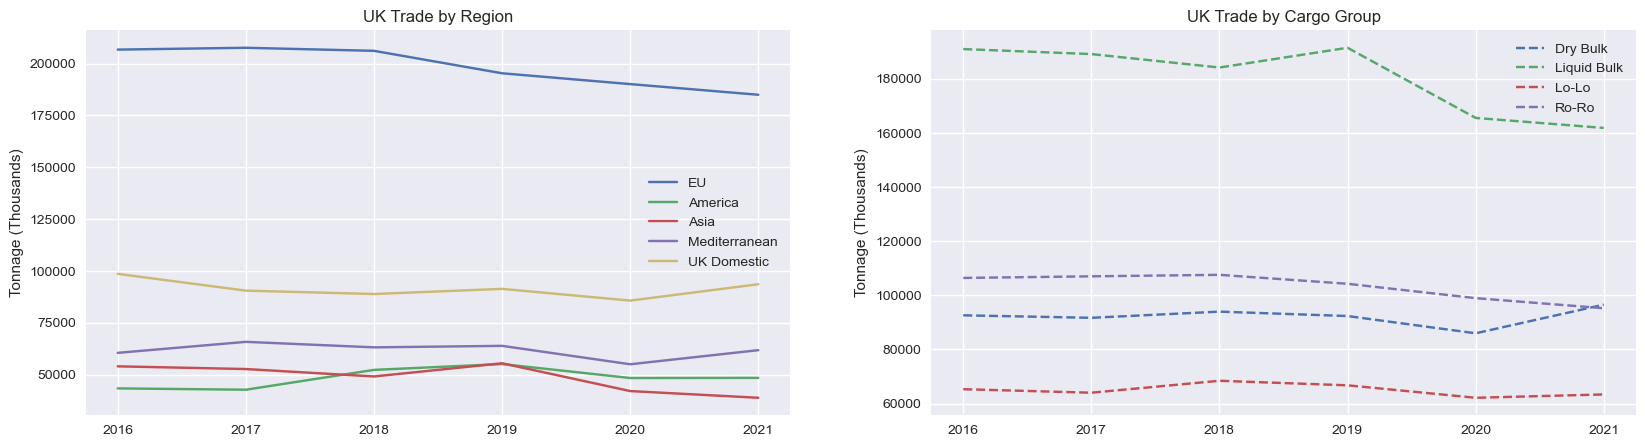

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Filter
df = df.loc[df['Direction'] == 'Both Directions']

#Filtered by Region
df_region = df.groupby(['Year', 'Region']).sum()
df_region = df_region.reset_index()
df_region = df_region.loc[df_region['Year'] > 2015]


data_EU = df_region.loc[df_region['Region'] == 'All European Union']
data_AF = df_region.loc[df_region['Region'] == 'All Africa']
data_AM = df_region.loc[df_region['Region'] == 'All America']
data_AS = df_region.loc[df_region['Region'] == 'Asia (excluding Mediterranean countries)']
data_ME = df_region.loc[df_region['Region'] == 'Other Europe & Mediterranean']
data_UK = df_region.loc[df_region['Region'] == 'UK Domestic']

#Filtered by Cargo Type
df_bycargo = df.groupby(['Year', 'Cargo Group']).sum()
df_bycargo = df_bycargo.reset_index()
df_bycargo = df_bycargo.loc[df_bycargo['Year'] > 2015]

data_DB = df_bycargo.loc[df_bycargo['Cargo Group'] == 'Dry Bulk']
data_LB = df_bycargo.loc[df_bycargo['Cargo Group'] == 'Liquid Bulk']
data_LO = df_bycargo.loc[df_bycargo['Cargo Group'] == 'Lo-Lo']
data_RO = df_bycargo.loc[df_bycargo['Cargo Group'] == 'Ro-Ro']

#Plot
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20, 5)

ax1.plot(data_EU['Year'], data_EU['Tonnage (thousands)'], label='EU')
#ax1.plot(data_AF['Year'], data_AF['Tonnage (thousands)'], label='Africa')
ax1.plot(data_AM['Year'], data_AM['Tonnage (thousands)'], label='America')
ax1.plot(data_AS['Year'], data_AS['Tonnage (thousands)'], label='Asia')
ax1.plot(data_ME['Year'], data_ME['Tonnage (thousands)'], label='Mediterranean')
ax1.plot(data_UK['Year'], data_UK['Tonnage (thousands)'], label='UK Domestic')

ax2.plot(data_DB['Year'], data_DB['Tonnage (thousands)'], linestyle='--', label='Dry Bulk')
ax2.plot(data_LB['Year'], data_LB['Tonnage (thousands)'], linestyle='--', label='Liquid Bulk')
ax2.plot(data_LO['Year'], data_LO['Tonnage (thousands)'], linestyle='--', label='Lo-Lo')
ax2.plot(data_RO['Year'], data_RO['Tonnage (thousands)'], linestyle='--', label='Ro-Ro')

ax1.legend()
ax1.set_title('UK Trade by Region')
ax1.set_ylabel('Tonnage (Thousands)')

ax2.legend()
ax2.set_title('UK Trade by Cargo Group')
ax2.set_ylabel('Tonnage (Thousands)')


#fig = make_subplots(rows=1, cols=2)
#fig.add_trace(go.Scatter(x=df_region['Year'], y=df_region.loc[df_region['Tonnage (thousands)'] == 'All European Union']), row=1, col=1)
#fig.update_layout(title = 'All Trades by Region')
#fig.show()

From the left chart chart it can be seen that UK's biggest trade is from EU.

The right chart shows that the biggest cargo type traded in the UK is Liquid Bulk

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Filter
df = df.loc[df['Direction'] == 'Both Directions']
df_EU = df.loc[df['Region'] == 'All European Union']
df_EU = df_EU.groupby(['Year']).sum()
df_EU = df_EU.reset_index()
df_EU["Growth Rate"] = df_EU['Tonnage (thousands)'].pct_change()
df_EU = df_EU.loc[df_EU['Year'] > 2015]

#Plot
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_EU['Year'], y=df_EU['Tonnage (thousands)'], name="Tonnage"), secondary_y=True)
fig.add_trace(go.Bar(x=df_EU['Year'], y=df_EU['Growth Rate'], name="Growth Rate"), secondary_y=False)
fig.update_yaxes(range=[180000, 210000], secondary_y=True)
fig.update_yaxes(range=[-0.06, 0.06], secondary_y=False)
fig.update_yaxes(title_text='Tonnage (thousands)', secondary_y=True)
fig.update_yaxes(title_text='Growth', secondary_y=False)
fig.update_layout(title = 'All Trades UK-EU')
fig.show()

The plot shows some effects in the period of brexit issue, starts from the referendum in 2016 until the official brexit in 2018

<b>Effect on major cargoes</b>

In [9]:
#Filtering Data
df_lb = df.loc[df['Cargo Group'] == 'Liquid Bulk']
df_lb = df_lb.loc[~df_lb['Region'].str.contains('Unspecified')]
df_lb = df_lb.loc[~df_lb['Region'].str.contains('Australasia')]
df_lb = df_lb.groupby(['Region', 'Year'])['Tonnage (thousands)'].sum().pct_change()
df_lb = df_lb.reset_index()
df_lb = df_lb.loc[df_lb['Year'] > 2015]

#Plot
fig = px.bar(
    df_lb, x='Region', y='Tonnage (thousands)', animation_frame='Year', color='Region',
    color_discrete_map={
                'All Africa': 'gray',
                'All America': 'gray',
                'Australasia': 'gray',
                'Other Europe & Mediterranean': 'gray',
                'UK Domestic': 'gray',
                'All European Union': 'crimson',
                'Asia (excluding Mediterranean countries)': 'gray'},
    range_y=[-0.5,0.5])
fig.update_layout(showlegend=False)
fig.update_layout(title='UK Liquid Bulk Trade')

fig.show()



The chart above shows the Liquid Bulk trade growth between UK and EU after the brexit discussion started (2016) always below 0. It means the trend always decreases

In [15]:
#Data Filter
df_roro = df.loc[(df['Direction'] == 'Both Directions') & (df['Cargo Group'] == 'Ro-Ro')]
df_roro = df_roro.groupby(['Year', 'Region']).sum()
df_roro = df_roro.reset_index()
df_roro = df_roro.loc[df_roro['Year'] > 2012]

#Plot
fig = px.line(df_roro, x='Year', y='Tonnage (thousands)', color='Region', markers='Region')
fig.update_layout(title = 'UK Ro-Ro by Region')
fig.show()

The chart above shows the Ro-RO trade between UK and EU after the brexit discussion started (2016) keep decreasing. However, there is increase trend on the UK Domestic Ro-Ro trade